In [132]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

In [133]:
loss = pd.read_csv('checkpoints/vae_12_18_3/loss.csv', delimiter=',')

In [134]:
loss.tail()

,epoch,iters,mse,kl,cycle,total,iter_time,iter_data_time
4190,4,8340,-247.633596,5.974295,0.0,-241.659301,6.254619,0.114855
4191,4,8350,-297.257105,6.068550,0.0,-291.188557,6.142948,0.091457
4192,4,8360,-261.798445,6.109879,0.0,-255.688568,6.183193,0.091266
4193,4,8370,-252.886628,6.101867,0.0,-246.784756,6.095200,0.090488
4194,4,8380,-352.599554,6.044426,0.0,-346.555133,6.123008,0.104329


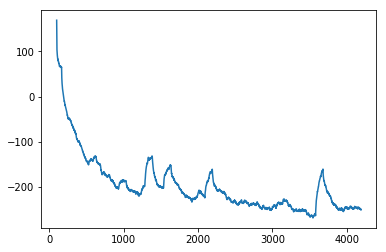

In [137]:
loss['total'].tail(5000).rolling(window=100).mean().plot()

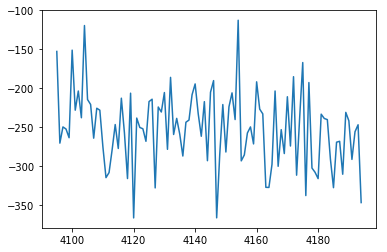

In [136]:
loss['total'].tail(100).plot()

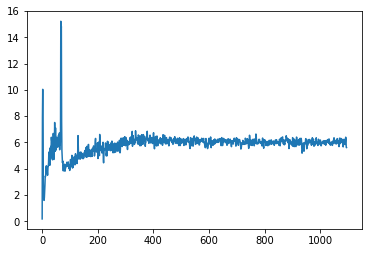

In [127]:
loss['kl'].plot()